In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import nmma
import json
import os
import bilby
from astropy.time import Time

In [3]:
from nmma.em.model import SimpleKilonovaLightCurveModel,GRBLightCurveModel, SVDLightCurveModel, KilonovaGRBLightCurveModel, GenericCombineLightCurveModel, SupernovaLightCurveModel

from nmma.em.injection import create_light_curve_data as cld

Install afterglowpy if you want to timeout simulations.


In [4]:
lcPath = './candidate_data/paper_candidates/v2/candidate_data/ZTF20abwysqyForced.dat'
df = pd.read_csv(lcPath, sep=' ', header=None, names=['t', 'filter', 'mag', 'mag_unc'])

trigger_time = 59087.18740740741
df['t'] = Time(pd.to_datetime(df['t'])).mjd
df['t'] = df['t'] - trigger_time

display(df)

,t,filter,mag,mag_unc
0,6.132072,i,20.193004,inf
1,6.181840,r,20.265292,inf
2,6.268993,g,20.107244,inf
3,7.218819,r,19.833552,inf
4,7.283854,g,19.838025,inf
5,8.166944,g,19.909915,inf
6,8.260023,r,20.097329,inf
7,-6.742778,g,21.236449,inf
8,-5.762164,r,21.351784,inf
9,-5.720660,g,21.167371,inf


In [5]:
snPath = './outdir/abwysqyForced_nugent-hyper/abwysqyForced_nugent-hyper_result.json'
grbPath = './outdir/abwysqyForced_TrPi2018/abwysqyForced_TrPi2018_result.json'
with open(snPath,"r") as f:
    snResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)
with open (grbPath,"r") as f:
    grbResults = json.load(f, object_hook=bilby.core.utils.decode_bilby_json)


In [6]:
grbResults['posterior']

,luminosity_distance,inclination_EM,log10_E0,thetaCore,thetaWing,log10_n0,p,log10_epsilon_e,log10_epsilon_B,Ebv,KNtimeshift,ksiN,L0,dL,b,q,ts,log_likelihood,log_prior
0,760.890835,0.655995,51.730769,0.311806,0.578721,-0.782234,2.913166,-0.152170,-1.858222,0.410458,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-9.647628,-15.050239
1,452.559116,0.623241,52.508718,0.327808,0.734971,-2.467347,2.377148,-1.627941,-1.975409,0.427928,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-8.899586,-15.208432
2,2543.450563,0.868613,52.741117,0.365214,1.095788,-0.374173,2.804276,-0.070324,-2.670773,0.351564,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.624298,-14.515607
3,4998.930076,0.746411,52.286948,0.341336,1.301897,-2.508060,2.289664,-0.654658,-1.096161,0.002701,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.187254,-13.685111
4,2291.400043,0.489612,51.021412,0.462575,1.065735,-0.647358,2.386646,-0.253448,-0.977212,0.254554,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-7.101028,-14.635949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,1965.116307,0.381917,51.513709,0.299556,1.140804,-1.272135,2.644654,-0.596440,-1.468649,0.371403,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-4.096546,-15.326787
374,4294.374224,0.292769,51.971602,0.297630,0.488789,-0.702897,2.261428,-0.623656,-1.793515,0.256699,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-4.048587,-15.130998
375,3749.242207,0.392440,52.497250,0.182474,0.863106,-1.551302,2.574560,-0.638874,-1.537252,0.145955,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-3.990170,-14.548786
376,4061.615067,0.276128,52.273153,0.288549,0.826688,-3.005089,2.783521,-0.357209,-2.223391,0.100694,0.0,1.0,0.0,3.090000e+19,6.0,0.0,0.0,-3.916825,-14.786370


In [41]:
sample_times = np.arange(0.01, 14, 0.1)
snModel = SupernovaLightCurveModel(sample_times=sample_times, model='nugent-hyper')
grbModel = GRBLightCurveModel(sample_times=sample_times, model='TrPi2018')

In [58]:
grb_df = pd.DataFrame(grbResults['posterior'])
grb_llq = grb_df.quantile([0.16, 0.5, 0.84], axis=0 )['log_likelihood']
display(grb_llq)
## locate where these quantiles occur and return the 3 rows as a dataframe
grb_lc_params = grb_df[grb_df['log_likelihood'].isin(grb_llq)][1:].to_dict('list')
display(grb_lc_params)

## seperate dictionary into array of dictionaries
grb_lc_params = [dict(zip(grb_lc_params, t)) for t in zip(*grb_lc_params.values())]
display(grb_lc_params)

sn_df = pd.DataFrame(snResults['posterior'])
sn_llq = sn_df.quantile([0.16, 0.5, 0.84], axis=0 )['log_likelihood']
display(sn_llq)
sn_lc_params = sn_df[sn_df['log_likelihood'].isin(sn_llq)].to_dict('list')
sn_lc_params = [dict(zip(sn_lc_params, t)) for t in zip(*sn_lc_params.values())]
display(sn_lc_params)
display(sn_df['log_likelihood'].isin(sn_llq)[sn_df['log_likelihood'].isin(sn_llq)].index)
display(grb_df['log_likelihood'].isin(grb_llq)[grb_df['log_likelihood'].isin(grb_llq)].index)

0.16   -5.084370
0.50   -4.282634
0.84   -4.019226
Name: log_likelihood, dtype: float64

{'luminosity_distance': [5906.64108844669,
  5166.678662178765,
  5166.678662178765],
 'inclination_EM': [0.7506616459100515,
  0.8434895709961788,
  0.8434895709961788],
 'log10_E0': [52.80529820671652, 52.15022022756525, 52.15022022756525],
 'thetaCore': [0.5095672193192546, 0.5056496047735668, 0.5056496047735668],
 'thetaWing': [0.7826954716448337, 1.0523055465540039, 1.0523055465540039],
 'log10_n0': [-1.865374777755095, -3.172526603923151, -3.172526603923151],
 'p': [2.789522144665984, 2.4012606611674383, 2.4012606611674383],
 'log10_epsilon_e': [-1.2104876735499253,
  -1.0757501928686761,
  -1.0757501928686761],
 'log10_epsilon_B': [-0.8234554109966705,
  -0.15584890666968,
  -0.15584890666968],
 'Ebv': [0.2268652572787538, 0.017172973598668234, 0.017172973598668234],
 'KNtimeshift': [0.0, 0.0, 0.0],
 'ksiN': [1.0, 1.0, 1.0],
 'L0': [0.0, 0.0, 0.0],
 'dL': [3.09e+19, 3.09e+19, 3.09e+19],
 'b': [6.0, 6.0, 6.0],
 'q': [0.0, 0.0, 0.0],
 'ts': [0.0, 0.0, 0.0],
 'log_likelihood': [-5.

[{'luminosity_distance': 5906.64108844669,
  'inclination_EM': 0.7506616459100515,
  'log10_E0': 52.80529820671652,
  'thetaCore': 0.5095672193192546,
  'thetaWing': 0.7826954716448337,
  'log10_n0': -1.865374777755095,
  'p': 2.789522144665984,
  'log10_epsilon_e': -1.2104876735499253,
  'log10_epsilon_B': -0.8234554109966705,
  'Ebv': 0.2268652572787538,
  'KNtimeshift': 0.0,
  'ksiN': 1.0,
  'L0': 0.0,
  'dL': 3.09e+19,
  'b': 6.0,
  'q': 0.0,
  'ts': 0.0,
  'log_likelihood': -5.08437040464198,
  'log_prior': -14.180548702973066},
 {'luminosity_distance': 5166.678662178765,
  'inclination_EM': 0.8434895709961788,
  'log10_E0': 52.15022022756525,
  'thetaCore': 0.5056496047735668,
  'thetaWing': 1.0523055465540039,
  'log10_n0': -3.172526603923151,
  'p': 2.4012606611674383,
  'log10_epsilon_e': -1.0757501928686761,
  'log10_epsilon_B': -0.15584890666968,
  'Ebv': 0.017172973598668234,
  'KNtimeshift': 0.0,
  'ksiN': 1.0,
  'L0': 0.0,
  'dL': 3.09e+19,
  'b': 6.0,
  'q': 0.0,
  'ts':

0.16   -25.556952
0.50   -24.158568
0.84   -23.533974
Name: log_likelihood, dtype: float64

[{'luminosity_distance': 852.7136717470121,
  'inclination_EM': 0.44294089102429357,
  'supernova_mag_boost': 0.10529952575291723,
  'Ebv': 0.03219631732523247,
  'KNtimeshift': 0.0,
  'log_likelihood': -24.15856762910818,
  'log_prior': -11.503460018750804},
 {'luminosity_distance': 852.7136717470121,
  'inclination_EM': 0.44294089102429357,
  'supernova_mag_boost': 0.10529952575291723,
  'Ebv': 0.03219631732523247,
  'KNtimeshift': 0.0,
  'log_likelihood': -24.15856762910818,
  'log_prior': -11.503460018750804}]

Int64Index([265, 266], dtype='int64')

Int64Index([60, 61, 188, 189], dtype='int64')

In [59]:
#quantiles = lambda x: 
# grb_lc_params = [
#     {key: np.quantile(value, q) for key, value in grbResults['posterior'].items()}
#     for q in [0.16, 0.5, 0.84]
# ]
display(grb_lc_params)
sn_lc_params = [
    {key: np.quantile(value, q) for key, value in snResults['posterior'].items()}
    for q in [0.16, 0.5, 0.84]
]
sn16, sn50, sn84 = (snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[0]), 
                    snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[1]), 
                    snModel.generate_lightcurve(sample_times=sample_times,parameters=sn_lc_params[2]))

grb16, grb50, grb84 = (grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[0]),
                       grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[1]),
                       grbModel.generate_lightcurve(sample_times=sample_times,parameters=grb_lc_params[2]))


## injection.py shows how to do the absolute (this is currently absolute mag) 

[{'luminosity_distance': 5906.64108844669,
  'inclination_EM': 0.7506616459100515,
  'log10_E0': 52.80529820671652,
  'thetaCore': 0.5095672193192546,
  'thetaWing': 0.7826954716448337,
  'log10_n0': -1.865374777755095,
  'p': 2.789522144665984,
  'log10_epsilon_e': -1.2104876735499253,
  'log10_epsilon_B': -0.8234554109966705,
  'Ebv': 0.2268652572787538,
  'KNtimeshift': 0.0,
  'ksiN': 1.0,
  'L0': 0.0,
  'dL': 3.09e+19,
  'b': 6.0,
  'q': 0.0,
  'ts': 0.0,
  'log_likelihood': -5.08437040464198,
  'log_prior': -14.180548702973066},
 {'luminosity_distance': 5166.678662178765,
  'inclination_EM': 0.8434895709961788,
  'log10_E0': 52.15022022756525,
  'thetaCore': 0.5056496047735668,
  'thetaWing': 1.0523055465540039,
  'log10_n0': -3.172526603923151,
  'p': 2.4012606611674383,
  'log10_epsilon_e': -1.0757501928686761,
  'log10_epsilon_B': -0.15584890666968,
  'Ebv': 0.017172973598668234,
  'KNtimeshift': 0.0,
  'ksiN': 1.0,
  'L0': 0.0,
  'dL': 3.09e+19,
  'b': 6.0,
  'q': 0.0,
  'ts':

In [11]:
#sn84[1]

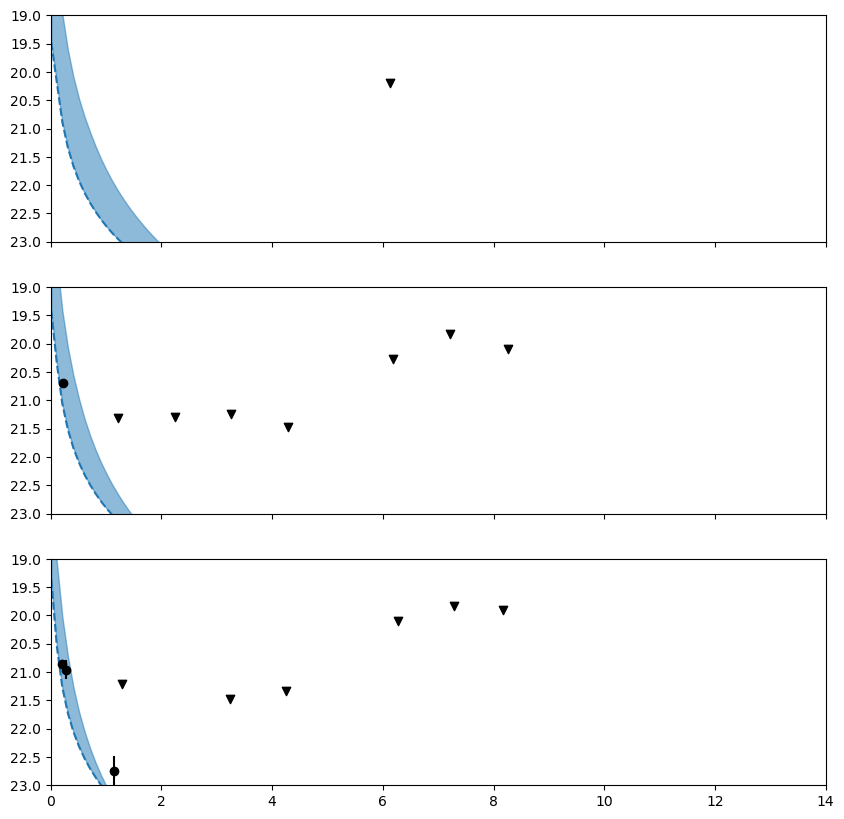

In [60]:
fig, axs = plt.subplots(3,1,figsize=(10, 10),sharex=True, sharey=True)
filters = ['i', 'r', 'g']

for i, filter in enumerate(filters):
    ax = axs[i]
    grb_lc_lower = grb16[1][filter] +5 * np.log10(grb_lc_params[0]["luminosity_distance"] * 1e6 / 10.0)
    grb_lc_mid = grb50[1][filter] +5 * np.log10(grb_lc_params[1]["luminosity_distance"] * 1e6 / 10.0)
    grb_lc_upper = grb84[1][filter] +5 * np.log10(grb_lc_params[2]["luminosity_distance"] * 1e6 / 10.0)
    # ax.fill_between(sample_times, grb16[1][filter], grb84[1][filter], color='C0', alpha=0.5)
    # ax.plot(sample_times, grb50[1][filter], color='C0')
    ax.fill_between(sample_times, grb_lc_lower, grb_lc_upper, color='C0', alpha=0.5)
    ax.plot(sample_times, grb_lc_mid, color='C0', linestyle='--')
    
    try:
        detections = df[(df['filter'] == filter) & (df['mag_unc'] != np.inf)]
    except:
        detections = None
    try:
        non_detections = df[(df['filter'] == filter) & (df['mag_unc'] == np.inf)]
    except:
        non_detections = None
    #non_detections = df[(df['filter'] == filter) & (df['mag_unc'] is np.inf)]
    #display(detections)
    
    try: 
        ax.errorbar(detections['t'], detections['mag'], yerr=detections['mag_unc'], fmt='o', color='k') 
    except: 
        None
    try: 
        ax.scatter(non_detections['t'], non_detections['mag'], marker='v', color='k') 
    except: 
        None
    ax.invert_yaxis()
    ax.set_ylim(23, 19)
    ax.set_xlim(0,14)